## INTRODUCTION

**During the course of this project we will be accessing a telecom operator datasets to forecast 'churn' of thier client. The main goal will be to classify each client into one of two groups(Loyal_Customer and Churn_Customer) and as a possible solution for the business problems, we will try to induce loyalty to those who are leaving or going to leave by offering promotional codes and/or special option as a fix for the telecom operator clients problem.**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from lightgbm import LGBMClassifier

## Propose Work Plan

**As stated in the introduction above, the goal for the telecom operator project is to forecast their churn of clients.The step to achieve the goal will be as follow with an elaborate and chronological procedure and a small summary of a work flow will be givens toward the end.**

## 1. Loading and Inspecting the Data

**A) Here we read in the dataset into a DataFrame and use functions like .head(), .info(), and .describe(), .shape, .columns to get an overview of the structure, column types, and basic statistics.**

## 2. Preliminary EDA : Check for Missing Values / Identify and Handle Duplicates



**A) Here we use .duplicated() to find and .drop_duplicates() to remove any duplicate rows.**

**B) Here we identify missing values using .isnull().sum() and decide how to handle them (remove, fill with mean/median/mode, or flag them).**



## 3. Advance EDA

**Here we perform the following:**

**A) Understanding Data Types and Converting if Necessary**

**Here we verify that each column has the correct data type using .dtypes. Convert types as needed (from object to datetime or category).**

**B) Class Imbalance**

**This will/ could be handle during the data Train-Test Split or by choising the appropriate model**

**C) Bivariate/Multivariate Analysis**

**Here we analyze distributions of individual columns using statistics and visualizations and also explore relationships between columns(histograms)**

**D) Detect and Handle Outliers**

**Here we identify outliers using isolation forest and decide how to treat them.**

**E) Features Engineering**

**This was done by focusing on features that will help capture more risk and improve prediction**

**At the end of the work flow all data will be merged into a single DataFrame follow by a small work flow summary.**

## 4. Modeling

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Looks good here, you are good to submit the next part of the project and get that graded! 
<a class="tocSkip">


## Load Data

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [3]:
df_contract.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

In [4]:
df_contract = df_contract.drop_duplicates()

In [5]:
df_contract.duplicated().sum()

0

In [6]:
df_contract.isnull().sum().sum()

0

In [7]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 495.2+ KB


In [8]:
df_contract.shape

(7043, 8)

In [9]:
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_personal.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [10]:
df_personal= df_personal.drop_duplicates()

In [11]:
df_personal.duplicated().sum()

0

In [12]:
df_personal.isnull().sum().sum()

0

In [13]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 330.1+ KB


In [14]:
df_personal.shape

(7043, 5)

In [15]:
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_internet.head()

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

In [16]:
df_internet = df_internet.drop_duplicates()

In [17]:
df_internet.duplicated().sum()

0

In [18]:
df_internet.isnull().sum().sum()

0

In [19]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 387.9+ KB


In [20]:
df_internet.shape

(5517, 8)

In [21]:
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')
df_phone.head()

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

In [22]:
df_phone = df_phone.drop_duplicates()

In [23]:
df_phone.duplicated().sum()

0

In [24]:
df_phone.isnull().sum().sum()

0

In [25]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 149.1+ KB


In [26]:
df_phone.shape

(6361, 2)

## Quick note:

**Data was loaded and some pre-exploration of the data was performed with some output displayed**

## ADVANCE EDA

## Let rename all the columns in each dataset for clarity

In [27]:
df_contract = df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 
                'EndDate': 'end_date', 'Type': 'type', 
                'PaperlessBilling': 'paperless_billing','PaymentMethod': 'payment_method', 
                'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'})

In [28]:
df_contract.describe()

monthly_charges
count      7043.000000
mean         64.761692
std          30.090047
min          18.250000
25%          35.500000
50%          70.350000
75%          89.850000
max         118.750000

In [29]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 495.2+ KB


In [30]:
df_personal = df_personal.rename(columns={'customerID': 'customer_id', 
                'SeniorCitizen': 'senior_citizen ', 
                 'Partner': 'partner','Dependents': 'dependents' })

In [31]:
df_personal.describe()

senior_citizen 
count      7043.000000
mean          0.162147
std           0.368612
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000

In [32]:
df_internet = df_internet.rename(columns={'customerID': 'customer_id', 'TechSupport': 'tech_support', 
                'InternetService': ' internet_service', 'OnlineSecurity': 'online_security', 
                'OnlineBackup': 'online_backup','DeviceProtection': 'device_protection', 
                'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'})

In [33]:
df_internet.describe()

customer_id  internet_service online_security online_backup  \
count         5517              5517            5517          5517   
unique        5517                 2               2             2   
top     9647-ERGBE       Fiber optic              No            No   
freq             1              3096            3498          3088   

       device_protection tech_support streaming_tv streaming_movies  
count               5517         5517         5517             5517  
unique                 2            2            2                2  
top                   No           No           No               No  
freq                3095         3473         2810             2785

In [34]:
df_phone = df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': ' multiple_lines '})

In [35]:
df_phone.describe()

customer_id  multiple_lines 
count         6361             6361
unique        6361                2
top     8490-BXHEO               No
freq             1             3390

## Accessing data type 

**df_contract**

In [36]:
df_contract.columns = df_contract.columns.str.strip()

In [37]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'])
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], errors='coerce')
df_contract['customer_id'] = df_contract['customer_id'].astype('category')
df_contract['type'] = df_contract['type'].astype('category')
df_contract['payment_method'] = df_contract['payment_method'].astype('category')
df_contract['paperless_billing'] = df_contract['paperless_billing'].map({'Yes': True, 'No': False})
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'], errors='coerce')
df_contract['monthly_charges'] = pd.to_numeric(df_contract['monthly_charges'], errors='coerce')

In [38]:
df_contract['total_charges'].isna().sum()

11

In [39]:
df_contract = df_contract.dropna(subset=['total_charges'])

In [40]:
df_contract.shape

(7032, 8)

In [41]:
#df_contract.info()

**df_personal**

In [42]:
print(df_personal.columns.tolist())

['customer_id', 'gender', 'senior_citizen ', 'partner', 'dependents']


In [43]:
# Strip all leading/trailing whitespace from column names
df_personal.columns = df_personal.columns.str.strip()

In [44]:
df_personal['customer_id'] = df_personal['customer_id'].astype('category')
df_personal['gender'] = df_personal['gender'].astype('category')
df_personal['senior_citizen'] = df_personal['senior_citizen'].astype(bool)
df_personal['partner'] = df_personal['partner'].map({'Yes': True, 'No': False})
df_personal['dependents'] = df_personal['dependents'].map({'Yes': True, 'No': False})

**df_internet**

In [45]:
df_internet.columns = df_internet.columns.str.strip()

In [46]:
df_internet['customer_id'] = df_internet['customer_id'].astype('category')
df_internet['internet_service'] = df_internet['internet_service'].astype('category')
# Convert Yes/No columns to boolean
bool_cols = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]

df_internet[bool_cols] = df_internet[bool_cols].applymap(lambda x: x == 'Yes')

In [47]:
#df_internet.info()
#df_internet.head()

**df_phone**

In [48]:
df_phone.columns = df_phone.columns.str.strip()

In [49]:
df_phone['customer_id'] = df_phone['customer_id'].astype('category')
df_phone['multiple_lines'] = df_phone['multiple_lines'].map({'Yes': True, 'No': False})

## Target column, class imbalance, data distribution

**df_contract**

In [50]:
# Reference date (data is valid as of Feb 1, 2020)
reference_date = pd.to_datetime('2020-02-01')

# Define churn:
# - churn=1 if EndDate ≤ Feb 1, 2020 (customer left)
# - churn=0 if EndDate > Feb 1, 2020 or is NaT (active)
df_contract['churn'] = (df_contract['end_date'] <= reference_date).astype(int)

# Check counts
print(df_contract['churn'].value_counts())

0    5163
1    1869
Name: churn, dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Good job deriving the target!
    <a class="tocSkip"></a>

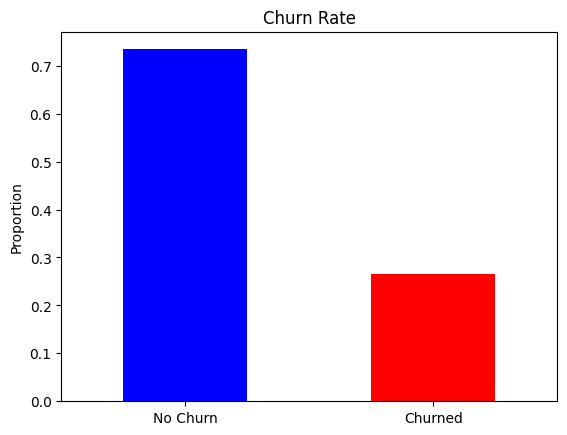

In [51]:
df_contract['churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Rate', color=['blue', 'red'])
plt.xticks([0, 1], ['No Churn', 'Churned'], rotation=0)
plt.ylabel('Proportion')
plt.show()

**From the above distribution we notice that about 70% of clients are still active (no churn) and we also see that about 30% of the clients churned.**

In [52]:
pd.crosstab(df_contract['type'], df_contract['churn'], normalize='index')


churn                  0         1
type                              
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487

In [53]:
churn_by_type = pd.crosstab(
    df_contract['type'],           # Contract type ( Monthly, Annual)
    df_contract['churn'],          # Churn status (0 or 1)
    normalize='index'              # Normalize by row (each type sums to 100%)
)


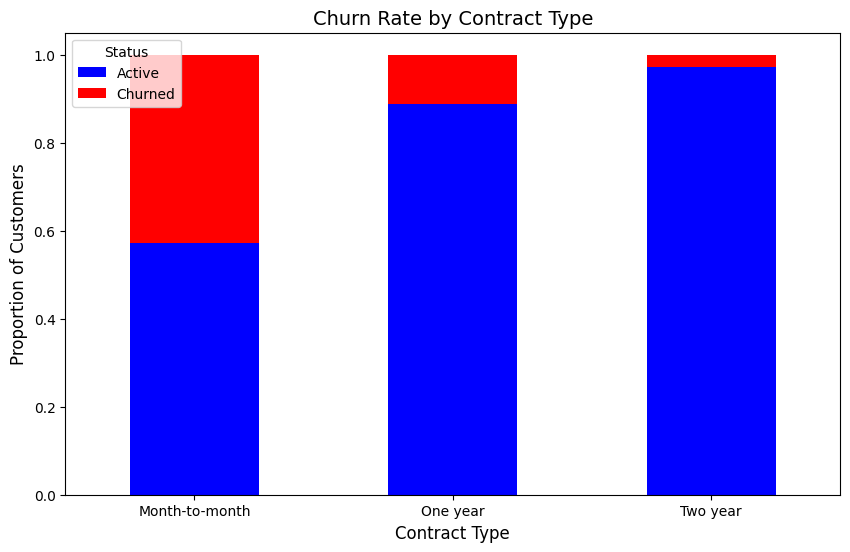

In [54]:
ax = churn_by_type.plot(
    kind='bar', 
    stacked=True, 
    color=['blue', 'red'],  # Blue=Active, Red=Churned
    figsize=(10, 6)
)

# labels
plt.title('Churn Rate by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Active', 'Churned'])

plt.show()

**The distribution of the churn rate by contract type indicate a higher active clients and low churned clients on the 2 and 1 years contract, however on the month to month basic we see an increase churned of clients**

**df_personal**

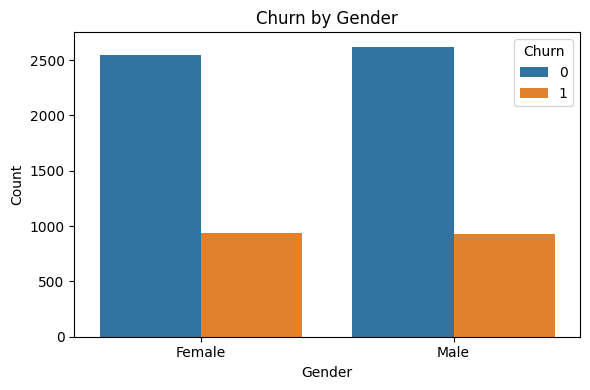

In [55]:
# Merge only temporarily inside plotting for visualization
temp = df_contract.merge(df_personal[['customer_id', 'gender', 'senior_citizen']], on='customer_id')

# Plot churn by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=temp, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**The above distribution clearly indicate that about 70% of Male and Female stay active compare to just a bit under 30% who churned(leaves).**

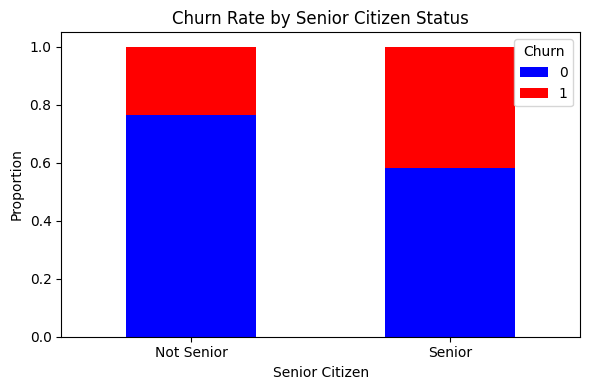

In [56]:
# Crosstab
churn_by_senior = pd.crosstab(temp['senior_citizen'], temp['churn'], normalize='index')

# Plot
churn_by_senior.plot(kind='bar', stacked=True, figsize=(6, 4), color=['blue', 'red'])
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Not Senior', 'Senior'], rotation=0)
plt.tight_layout()
plt.show()

**From the above distribution we see that not senior have a higher proportion of active client than non active client and compare to senior client we see that an almost even partition of active client and churned client(non active).**

**df_internet**

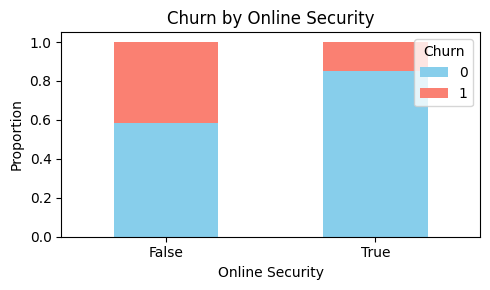

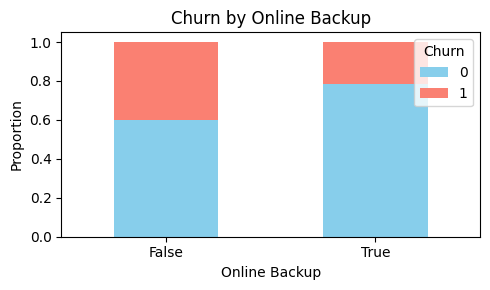

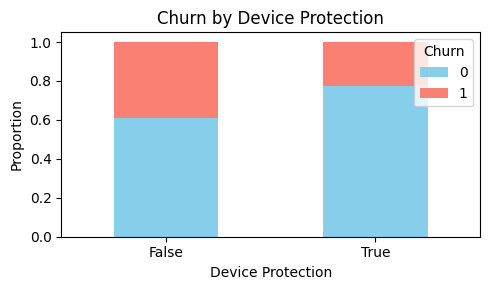

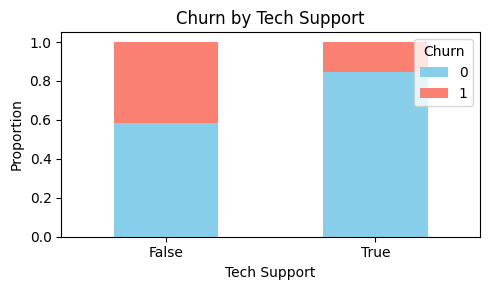

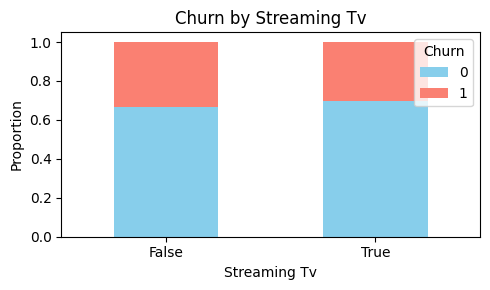

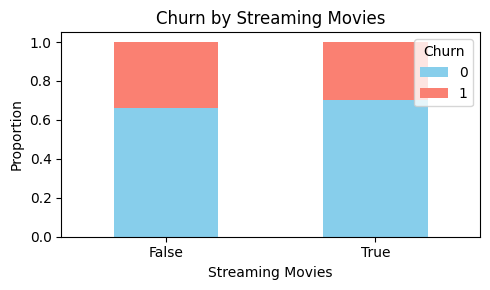

In [57]:
# Merge relevant columns
cols = ['customer_id', 'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies']
temp = df_contract.merge(df_internet[cols], on='customer_id')

# one plot for each column
for col in bool_cols:
    crosstab = pd.crosstab(temp[col], temp['churn'], normalize='index')

    crosstab.plot(kind='bar', stacked=True, figsize=(5, 3), color=['skyblue', 'salmon'])
    plt.title(f'Churn by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Proportion')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**We opted to churn all customer(have service/don't have service)because there are still paying cistomers in some others service(phone or basic internet).From the above distribution we see a large amount of active clients compare to non active client on online backup, online security, devise protection and techsupport services.We also see a small decrease of active customer but still higher compare to non active customer on streaming TV and streaming Movies services.**

**df_phone**

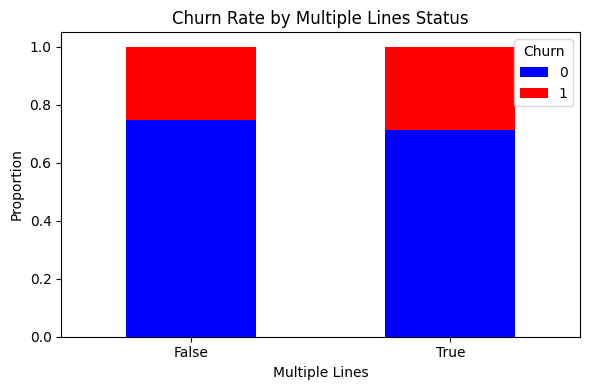

In [58]:
# Temporary merge for plotting
temp = df_contract.merge(df_phone[['customer_id', 'multiple_lines']], on='customer_id')
# Crosstab
churn_by_multiple_lines = pd.crosstab(temp['multiple_lines'], temp['churn'], normalize='index')

# Plot
churn_by_multiple_lines.plot(kind='bar', stacked=True, figsize=(6, 4), color=['blue', 'red'])
plt.title('Churn Rate by Multiple Lines Status')
plt.xlabel('Multiple Lines')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
# X-tick labels from index (No, Yes, No phone service)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**We clearly observe a higher proportion of active customer compare to a non active customer in the multiple lines services.**

## Outliers

**df_contract**

In [59]:
data = df_contract[['begin_date', 'end_date', 'monthly_charges', 'total_charges']].copy()

# Replace 'No' with a fixed point (Feb 1, 2020) before conversion
cutoff_date = pd.to_datetime('2020-02-01')
data['end_date'] = data['end_date'].fillna(cutoff_date)

# Encode dates as numeric (days since start)
data['begin_days'] = (cutoff_date - data['begin_date']).dt.days
data['end_days'] = (cutoff_date - data['end_date']).dt.days

# Convert total_charges to numeric
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')

# original datetime columns
data = data[['begin_days', 'end_days', 'monthly_charges', 'total_charges']]

In [60]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
estimation_iforest = model.fit_predict(data_scaled) == -1
outliers_iforest = estimation_iforest.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

Number of anomalies (isolation forest):  352


**I opted to keep it because it is about 5%, which aligns well with a common assumption that only a small fraction of data points are unusual or risky. the anomalies can sometime reflect real but rare customer behavior which is often the case in churn modeling.Removing anomalies might hide important behavior patterns that could help the model identify future churners.**

**df_personal**

In [61]:
model= IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
# Fit on selected numeric/binary columns
outliers = model.fit_predict(df_personal[['senior_citizen', 'partner', 'dependents']])== -1
#estimation_iforest = model.fit_predict(data_scaled) == -1
outliers_iforest = outliers.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

Number of anomalies (isolation forest):  91


**At 5% (contamination=0.05), you'd expect at least 352 outliers, but the scores suggest the data doesn't contain that many anomalies this indicating most points are considered normal because the Scores are heavily clustered i will hope.**
**I Need option please.**

**df_internet**

In [62]:
model = IsolationForest(
    contamination=0.05,  
    n_estimators=200,    # More trees for stable results
    random_state=42
)
outliers = model.fit_predict(df_internet[bool_cols]) == -1
outliers_iforest = outliers.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

Number of anomalies (isolation forest):  271


**The isolation Forest with contamination=0.05 detected 0 anomalies despite expecting ~276 outliers.This could be because isolation Forest struggles with pure binary features.**
**I need your input please.** 

## Features Engineering

**df_contract**

In [63]:
observation_date = pd.to_datetime('2020-02-01')  # cutoff date
df_contract['tenure_days'] = (observation_date - df_contract['begin_date']).dt.days
df_contract['is_longterm'] = (df_contract['tenure_days'] > 365).astype(int)
df_contract['recent_start'] = (df_contract['tenure_days'] < 30).astype(int)

**Tenure is the strongest churn predictor and Long-term customers may have different churn patterns and new customers are more prone to churn early (this captures that risk).**

**df_personal**

In [64]:
#Is_Alone = 1 if no partner and no dependents
df_personal['family_size'] = df_personal['partner'] + df_personal['dependents']
conditions = [
    (df_personal['senior_citizen'] == 1) & (df_personal['partner'] == 1),
    (df_personal['senior_citizen'] == 1) & (df_personal['partner'] == 0),
    (df_personal['senior_citizen'] == 0) & (df_personal['partner'] == 1),
    (df_personal['senior_citizen'] == 0) & (df_personal['partner'] == 0)
]
choices = ['Senior_with_Partner', 'Senior_Single', 'Young_with_Partner', 'Young_Single']
df_personal['life_stage'] = np.select(conditions, choices, default='Unknown')

df_personal['is_alone'] = ((df_personal['partner'] == 0) & (df_personal['dependents'] == 0)).astype(int)

df_personal['is_senior'] = df_personal['senior_citizen']  # Optional: duplicate for clarity

df_personal['gender_lifestage'] = df_personal['gender'].astype(str) + '_' + df_personal['life_stage']

/.venv/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


**We knows in many business setting such as telecoms operator that Family dynamics influence retention and can increase switching costs.LifeStage groups here will capture non-linear interactions.**

**df_internet**

In [65]:
columns = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies']

for col in columns:
    df_internet[col] = df_internet[col].map({'Yes': 1, 'No': 0, 'No internet service': 0}).fillna(0).astype(int)

df_internet['add_on_count'] = df_internet[columns].sum(axis=1)

df_internet['is_streaming_user'] = ((df_internet['streaming_tv'] == 1) | (df_internet['streaming_movies'] == 1)).astype(int)

if 'fiber_optic' in df_internet.columns:
    df_internet['tech_user'] = ((df_internet['fiber_optic'] == 1) & (df_internet['tech_support'] == 1)).astype(int)
else:
    df_internet['tech_user'] = 0  # fallback if dummies not yet created

**Add-on services increase switching costs and Fiber + TechSupport users are high-value but may churn if service is poor.**

**df_phone**

In [66]:
# Derived feature: Whether the customer has phone service at all
df_phone['has_phone_service'] = (df_phone['multiple_lines'] != 0).astype(int)

## Merge all dataset.

In [67]:
df = df_personal.copy()

df = df.merge(df_contract, on='customer_id', how='left')

df = df.merge(df_internet, on='customer_id', how='left')

df = df.merge(df_phone, on='customer_id', how='left')

In [68]:
# Shape of the final dataframe
print(df.shape)

# Quick summary of missing values
print(df.isnull().sum())

(7043, 33)
customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
family_size             0
life_stage              0
is_alone                0
is_senior               0
gender_lifestage        0
begin_date             11
end_date             5174
type                   11
paperless_billing      11
payment_method         11
monthly_charges        11
total_charges          11
churn                  11
tenure_days            11
is_longterm            11
recent_start           11
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
add_on_count         1526
is_streaming_user    1526
tech_user            1526
multiple_lines        682
has_phone_service     682
dtype: int64


In [69]:
df = df.drop(columns=['paperless_billing'])
#paperless_billing is completely empty (7043 missing values), so i can drop it.

In [70]:
#all the below columns have only 11 missing values 
#likely mismatched customers. We can safely drop these rows:
df = df.dropna(subset=[
    'begin_date', 'type', 'payment_method',
    'monthly_charges', 'total_charges', 'churn',
    'tenure_days', 'is_longterm', 'recent_start'
])

In [71]:
# Internet categorical columns to handle separately
internet_cat_cols = ['internet_service']

# Internet numeric/bool columns to fill with 0
internet_num_cols = [
    'online_security', 'online_backup', 'device_protection', 
    'tech_support', 'streaming_tv', 'streaming_movies', 
    'add_on_count', 'is_streaming_user', 'tech_user'
]

# Phone columns to fill with 0
phone_cols = ['multiple_lines', 'has_phone_service']

# Convert internet_service to object to fill NaN if needed, or add new category
# If you want to mark "no internet" customers explicitly as a new category:
df[internet_cat_cols[0]] = df[internet_cat_cols[0]].cat.add_categories('No Service')
df[internet_cat_cols[0]] = df[internet_cat_cols[0]].fillna('No Service')

# Fill numeric internet columns and phone columns with 0
df[internet_num_cols] = df[internet_num_cols].fillna(0)
df[phone_cols] = df[phone_cols].fillna(0)

**These customers exist in the merged dataset,but their entries for services like online_security, streaming_tv, and more are NaN.That suggests they didn’t subscribe to internet or phone service and not that the data is missing by error.So instead of leaving it as NaN, we're making it explicit.**

In [72]:
# Label encode 'internet_service' (or any similar column)
le = LabelEncoder()

# Ensure 'internet_service' is treated as string for encoding
# First, convert to string and fill missing with a sentinel value like 'No Service'
df['internet_service'] = df['internet_service'].astype(str)
df['internet_service'] = df['internet_service'].fillna('No Service')

# Apply Label Encoding
df['internet_service'] = le.fit_transform(df['internet_service'])

# Define the list of columns to exclude from one-hot encoding
exclude_cols = ['customer_id', 'life_stage', 'gender_lifestage', 'internet_service']

# Select all object/category columns excluding those in exclude_cols
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.difference(exclude_cols)

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [73]:

# Fill missing end_date with 2020-02-01 for active customers
reference_date = pd.to_datetime('2020-02-01')
df['effective_end_date'] = df['end_date'].fillna(reference_date)

# Calculate contract duration in days
df['contract_duration'] = (df['effective_end_date'] - df['begin_date']).dt.days

# Drop the helper column
df.drop(columns='effective_end_date', inplace=True)

# Final check
print(df['contract_duration'].isna().sum())  


0


In [74]:
df.drop(columns=['begin_date', 'end_date'], inplace=True)

In [75]:
# Quick summary of missing values
print(df.isnull().sum().sum())

0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7032 non-null   object 
 1   senior_citizen                          7032 non-null   bool   
 2   partner                                 7032 non-null   bool   
 3   dependents                              7032 non-null   bool   
 4   family_size                             7032 non-null   bool   
 5   life_stage                              7032 non-null   object 
 6   is_alone                                7032 non-null   int64  
 7   is_senior                               7032 non-null   bool   
 8   gender_lifestage                        7032 non-null   object 
 9   monthly_charges                         7032 non-null   float64
 10  total_charges                           7032 non-null   floa

In [77]:
df.describe()

is_alone  monthly_charges  total_charges        churn  tenure_days  \
count  7032.000000      7032.000000    7032.000000  7032.000000  7032.000000   
mean      0.466439        64.798208    2283.300441     0.265785  1008.031428   
std       0.498908        30.085974    2266.771362     0.441782   736.095040   
min       0.000000        18.250000      18.800000     0.000000    31.000000   
25%       0.000000        35.587500     401.450000     0.000000   306.000000   
50%       0.000000        70.350000    1397.475000     0.000000   883.000000   
75%       1.000000        89.862500    3794.737500     1.000000  1706.000000   
max       1.000000       118.750000    8684.800000     1.000000  2314.000000   

       is_longterm  recent_start  internet_service  online_security  \
count  7032.000000        7032.0       7032.000000           7032.0   
mean      0.704778           0.0          0.872582              0.0   
std       0.456175           0.0          0.737271              0.0   
min       0.000000           0.0          0.000000              0.0   
25%       0.000000           0.0          0.000000              0.0   
50%       1.000000           0.0          1.000000              0.0   
75%       1.000000           0.0          1.000000              0.0   
max       1.000000           0.0          2.000000              0.0   

       online_backup  ...  tech_user  has_phone_service  gender_Male  \
count         7032.0  ...     7032.0        7032.000000  7032.000000   
mean             0.0  ...        0.0           0.421928     0.504693   
std              0.0  ...        0.0           0.493902     0.500014   
min              0.0  ...        0.0           0.000000     0.000000   
25%              0.0  ...        0.0           0.000000     0.000000   
50%              0.0  ...        0.0           0.000000     1.000000   
75%              0.0  ...        0.0           1.000000     1.000000   
max              0.0  ...        0.0           1.000000     1.000000   

       multiple_lines_True  payment_method_Credit card (automatic)  \
count          7032.000000                             7032.000000   
mean              0.421928                                0.216297   
std               0.493902                                0.411748   
min               0.000000                                0.000000   
25%               0.000000                                0.000000   
50%               0.000000                                0.000000   
75%               1.000000                                0.000000   
max               1.000000                                1.000000   

       payment_method_Electronic check  payment_method_Mailed check  \
count                      7032.000000                  7032.000000   
mean                          0.336320                     0.228100   
std                           0.472483                     0.419637   
min                           0.000000                     0.000000   
25%                           0.000000                     0.000000   
50%                           0.000000                     0.000000   
75%                           1.000000                     0.000000   
max                           1.000000                     1.000000   

       type_One year  type_Two year  contract_duration  
count    7032.000000    7032.000000        7032.000000  
mean        0.209329       0.239619         987.538538  
std         0.406858       0.426881         747.153663  
min         0.000000       0.000000          30.000000  
25%         0.000000       0.000000         275.000000  
50%         0.000000       0.000000         883.000000  
75%         0.000000       0.000000        1676.000000  
max         1.000000       1.000000        2191.000000  

[8 rows x 26 columns]

In [78]:
df.shape

(7032, 34)

**Additional Feature Engineering**

In [79]:
#df['charge_ratio'] = df['monthly_charges'] / df['total_charges']
#df['tenure_months'] = df['tenure_days'] / 30
#df['value_gap'] = df['monthly_charges'] - df['monthly_charges'].median()

## Quick Summary of Propose Work Plan

**The initial step of the work plan flow was to load the data and display some sample representation of the dataset that include some basic statistic about each dataset.**
**The second step was to perform some preliminary EDA by fully exploring each dataset for duplicates values and missing values.The third step was to perform some advance EDA by accessing class imbalance, data type, data distribution, outliers and some features engineerings was performed and we ended by merging all the dataset into one dataframe with a quick proccessing after the merge.**

## Core Part

**Evaluation function for models**

In [80]:
def evaluate_model(model, feature_train, feature_test, target_train, target_test):
    eval_stats = {}
    
    for dataset_type, features, target in (('train', feature_train, target_train), 
                                           ('test', feature_test, target_test)):
        eval_stats[dataset_type] = {}
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # Accuracy
        eval_stats[dataset_type]['Accuracy'] = metrics.accuracy_score(target, pred_target)

        # AUC-ROC
        auc_roc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[dataset_type]['AUC-ROC'] = auc_roc

        # Plot ROC Curve for test set only
        if dataset_type == 'test':
            fpr, tpr, _ = metrics.roc_curve(target, pred_proba)
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve (Test Set)')
            plt.legend()
            plt.grid(True)
            plt.show()

    # Format evaluation stats as DataFrame
    df_eval_stats = pd.DataFrame(eval_stats).round(2)
    df_eval_stats = df_eval_stats.reindex(index=['Accuracy', 'AUC-ROC'])

    print(df_eval_stats)
    return df_eval_stats

**Train-Test Split**

In [81]:
feature = df.drop(columns=['customer_id', 'churn'])
target = df['churn']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, 
                                        stratify=target, test_size=0.2, random_state=12345)

**Let identify column types**

In [82]:
categorical_cols = feature.select_dtypes(include=['object']).columns.tolist()
numerical_cols = feature.select_dtypes(include=['float64', 'int64', 'bool', 'uint8']).columns.tolist()


**Let build a preprocessing pipeline**

In [83]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

## Working with models

### Model_1 - Baseline

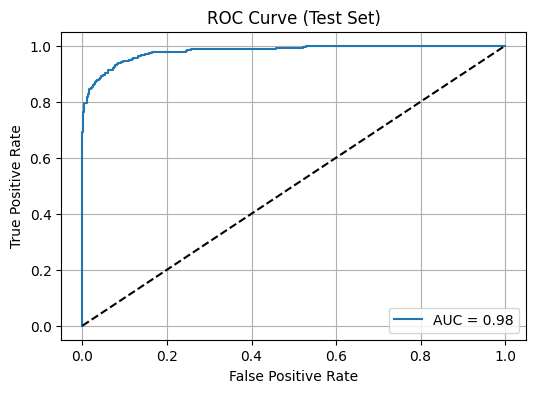

          train  test
Accuracy   0.93  0.93
AUC-ROC    0.98  0.98


train  test
Accuracy   0.93  0.93
AUC-ROC    0.98  0.98

In [84]:
model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=12345))
])

#  Fit 
model_1.fit(feature_train, target_train)

# Evaluate
evaluate_model(model_1, feature_train, feature_test, target_train, target_test)

## Model_2

**this choice of LightGBM model was used because it is efficient, handles categorical features well,the class_weight='balanced' is important due to churn imbalance.Overall it often outperforms traditional models in structured data.**

/.venv/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


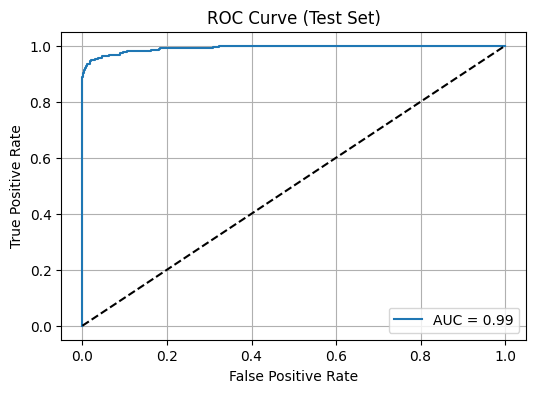

          train  test
Accuracy   0.99  0.97
AUC-ROC    1.00  0.99


train  test
Accuracy   0.99  0.97
AUC-ROC    1.00  0.99

In [85]:
#Let convert these columns to category dtype as required by LightGBM
# using LightGBM’s native categorical feature support will allows the model to treat categorical 
#variables without needing to label or one-hot encode them.

feature_train_lgb = feature_train.copy()
feature_test_lgb = feature_test.copy()

for col in categorical_cols:
    feature_train_lgb[col] = feature_train_lgb[col].astype('category')
    feature_test_lgb[col] = feature_test_lgb[col].astype('category')

model_2 = LGBMClassifier(
    class_weight='balanced',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=12345)

model_2.fit(
    feature_train_lgb,
    target_train,
    categorical_feature=categorical_cols)

evaluate_model(model_2, feature_train_lgb, feature_test_lgb, target_train, target_test)

## Conclusion

**It is with no objection that attrition in most business setting could be a nightmare situation,
without being a remote viewers not knowing which customer is loyal, which one is leaving or is not
happy with the services could directly impact the revenue of the business therefore the business existence.The Telecom Operator data colection was a great move to forecast potential or future problems.After training a couples of models with the Telecom Operator data, we can clearly and with precision guide the marketing team to which customers to send promotional offers (high-risk users) and reducing marketing cost and improving customer retention ROI.**
